### chapter 3 연습문제 1번

In [5]:
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X,y = mnist["data"], mnist["target"] 

print('X.shape :', X.shape)
print('y.shape :', y.shape)

X.shape : (70000, 784)
y.shape : (70000,)


In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

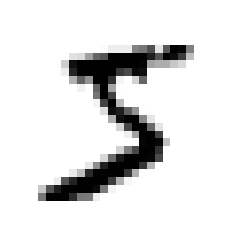

In [35]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [42]:
y = y.astype(np.uint8)

(0.0, 1.0, 0.0, 1.0)

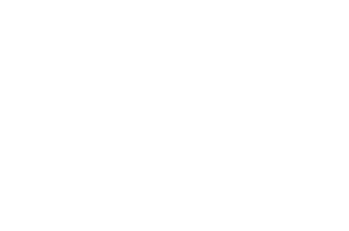

In [45]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")


In [46]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [47]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [54]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 10000, tol = 0.01, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=10000, random_state=42, tol=0.01)

In [55]:
sgd_clf.predict([some_digit])

array([ True])

In [56]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) 
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [59]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [60]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [61]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights':["uniform","distance"],'n_neighbors':[3,4,5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf,param_grid,cv=5,verbose=3)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

#### chapter 4 연습문제 1번

* 보통은 확률적 경사 하강법과 미니배치 경사 하강법을 사용한다.

#### chapter 4 연습문제 11번

* 배타적 클래스가 아니므로 두 개의 로지스틱 회귀 분류기를 만들어야 한다.